# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

## Mini-Projeto 2 - Análise Exploratória em Conjunto de Dados do Kaggle

## Análise 1

In [41]:
# Imports
import zipfile
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style = "white")
%matplotlib inline

In [42]:
# Dataset
#zf = zipfile.ZipFile('dataset/autos.zip')
#df = pd.read_csv(zf.open('autos.csv'),encoding = "latin-1")
clean_data_path = "dataset/autos.csv"
df = pd.read_csv(clean_data_path,encoding = "latin-1")

In [27]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [28]:
df.yearOfRegistration.describe()

count    313687.000000
mean       2001.909231
std           6.803211
min        1910.000000
25%        1998.000000
50%        2002.000000
75%        2006.000000
max        2016.000000
Name: yearOfRegistration, dtype: float64

## Distribuição de Veículos com base no Ano de Registro

C:\Users\lhattori\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


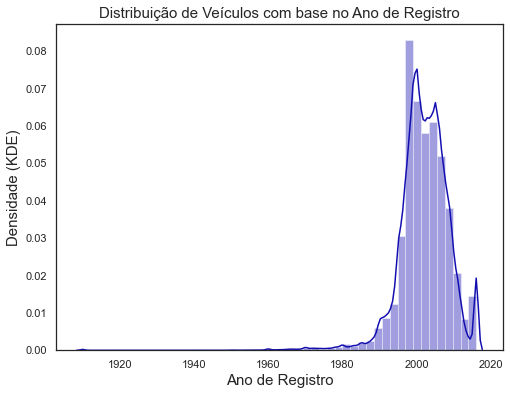

In [47]:
# Crie um Plot com a Distribuição de Veículos com base no Ano de Registro
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["yearOfRegistration"],kde=True, ax=ax, color="#130eb0")
ax.set_title('Distribuição de Veículos com base no Ano de Registro', fontsize= 15)
plt.ylabel("Densidade (KDE)", fontsize= 15)
plt.xlabel("Ano de Registro", fontsize= 15)
plt.show()

In [30]:
# Salvando o plot
fig.savefig("plots/Analise1/vehicle-distribution.png")

NameError: name 'fig' is not defined

## Variação da faixa de preço pelo tipo de veículo

Text(0.5, 1.0, 'Variação da faixa de preço pelo tipo de veículo')

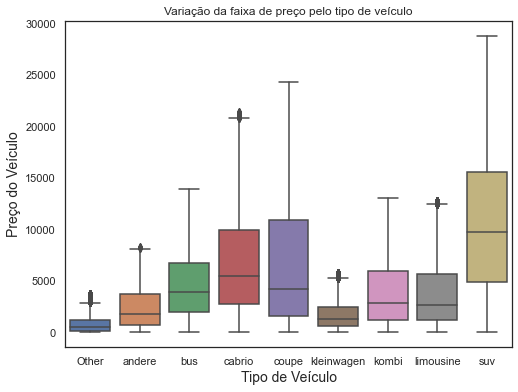

In [54]:
# Crie um Boxplot para avaliar os outliers
tipoveiculo = df["vehicleType"].unique()
tipoveiculo.sort()
tipoveiculo
import seaborn as sns
import matplotlib.pyplot as plt
#plt.figure(figsize=(12,6))
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="vehicleType", y="price", data = df, order = tipoveiculo)
#substituindo legendas
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':14})
ax.yaxis.set_label_text("Preço do Veículo",fontdict= {'size':14})
plt.title("Variação da faixa de preço pelo tipo de veículo")

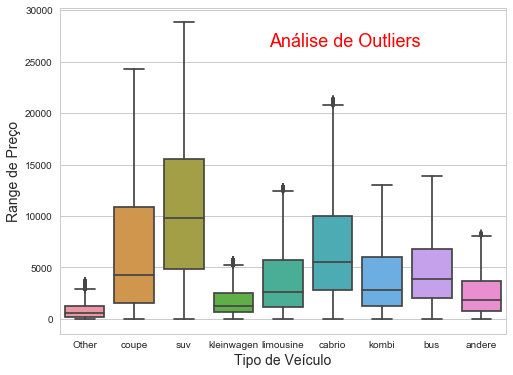

In [5]:
# Crie um Boxplot para avaliar os outliers SAMPLE DSA


In [6]:
# Salvando o plot
fig.savefig("plots/Analise1/price-vehicleType-boxplot.png")

## Contagem total de veículos à venda conforme o tipo de veículo

In [35]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen',
       'yearOfCreation', 'yearCrawled', 'monthOfCreation', 'monthCrawled',
       'NoOfDaysOnline', 'NoOfHrsOnline', 'yearsOld', 'monthsOld'],
      dtype='object')

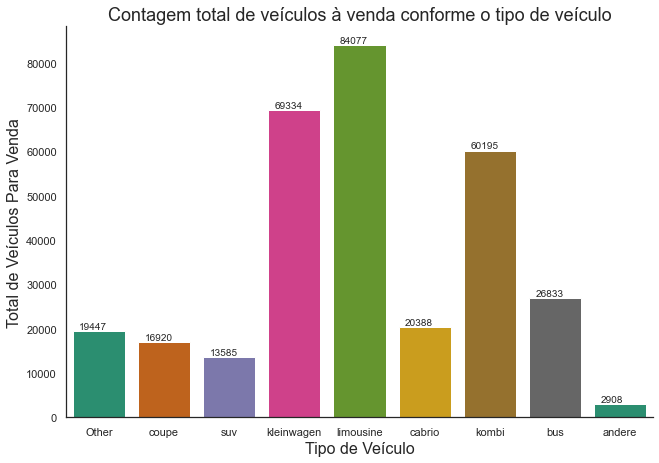

In [58]:
#fazer o gráfico de barras
sns.set_style("white")
g = sns.catplot(x="vehicleType", data=df, kind="count", palette="Dark2", height=6, aspect=1.5)
g.ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Total de Veículos Para Venda", fontdict= {'size':16})
g.ax.set_title("Contagem total de veículos à venda conforme o tipo de veículo",fontdict= {'size':18})
# inserir os rótulos de dados
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))

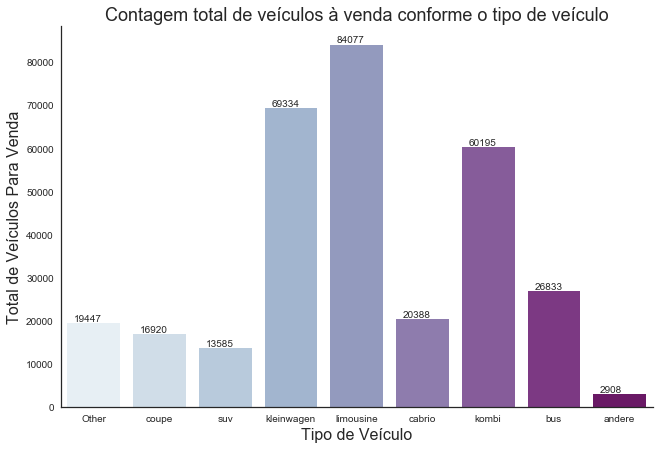

In [7]:
# Crie um Count Plot que mostre o número de veículos pertencentes a cada categoria 


In [8]:
# Salvando o plot
g.savefig("plots/Analise1/count-vehicleType.png")

Conheça a Formação Cientista de Dados, um programa completo, 100% online e 100% em português, com 340 horas, mais de 1.200 aulas em vídeos e 26 projetos, que vão ajudá-lo a se tornar um dos profissionais mais cobiçados do mercado de análise de dados. Clique no link abaixo, faça sua inscrição, comece hoje mesmo e aumente sua empregabilidade:

https://www.datascienceacademy.com.br/pages/formacao-cientista-de-dados

# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>